## Exam 2 (Due April 17, 2018 at 11:59 pm)

Please read each question carefully and apply the necessary exploratory analysis to each data set, as well as test for the assumptions relevant to each method when appropriate.

Write the answers in the space provided below each question.

$1$. Small sample sizes affects accuracy of a one tail t-test because it resembles a normal distribution.

a. True

b. False

In [1]:
"a. True"

$2$. Data on 102 male and 100 female athletes were collected at the Australian Institute of Sport. The data are  in the file ais.txt.

Develop a logistic regression model for gender ( y = 1 corresponds to female) or ( y = 0 corresponds to male) based on the following predictors (which is a subset of those available):

- RCC, read cell count
- WCC, white cell count
- BMI, body mass index
 
Remember to check for the model assumptions.

In [2]:
AIS = read.table(file = "ais.txt", header = T)

In [3]:
#install.packages("mosaic")
#install.packages("swirl")
library(dplyr)
library(ggplot2)
library(mosaic)
library(swirl)


Attaching package: ‘dplyr’

The following objects are masked from ‘package:stats’:

    filter, lag

The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union

Loading required package: lattice
Loading required package: ggformula

New to ggformula?  Try the tutorials: 
	learnr::run_tutorial("introduction", package = "ggformula")
	learnr::run_tutorial("refining", package = "ggformula")
Loading required package: mosaicData
Loading required package: Matrix

The 'mosaic' package masks several functions from core packages in order to add 
additional features.  The original behavior of these functions should not be affected by this.

Note: If you use the Matrix package, be sure to load it BEFORE loading mosaic.

Attaching package: ‘mosaic’

The following object is masked from ‘package:Matrix’:

    mean

The following objects are masked from ‘package:dplyr’:

    count, do, tally

The following objects are masked from ‘package:stats’:

    binom.test, co

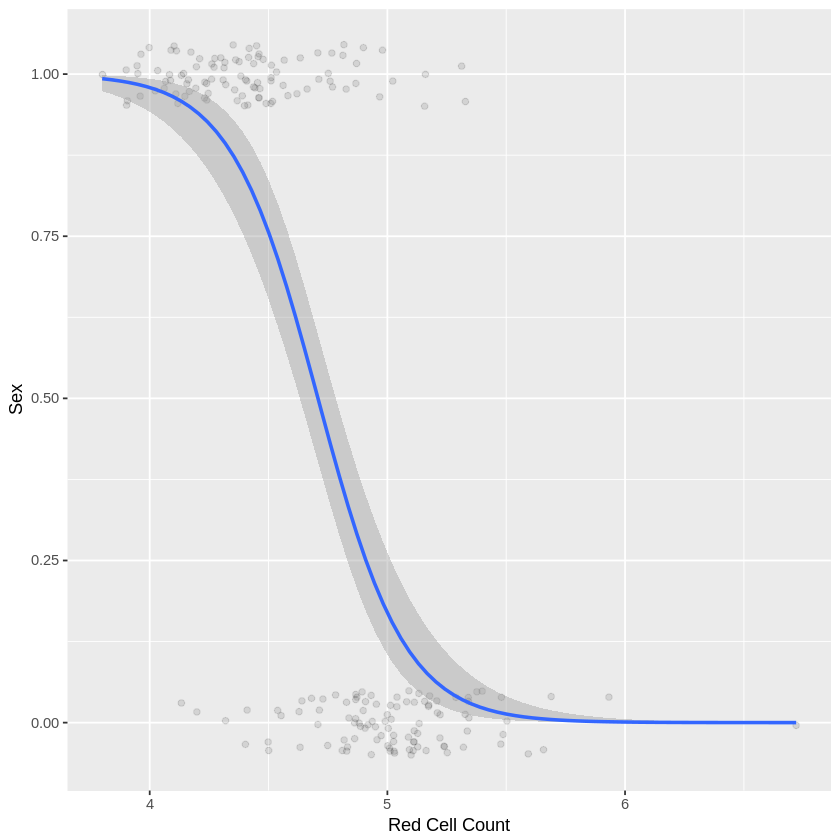

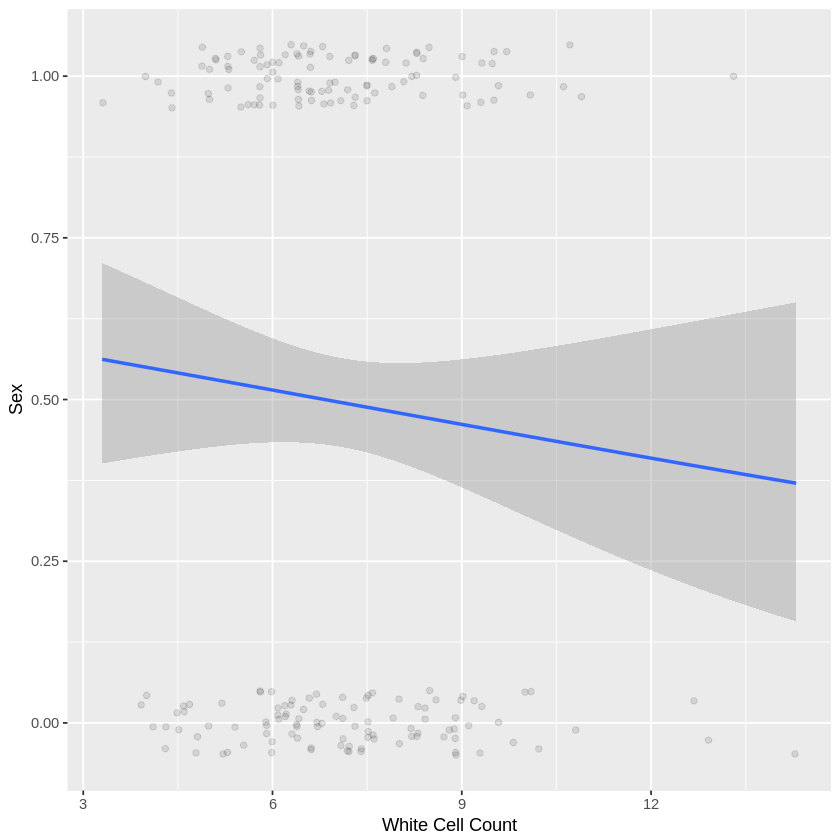

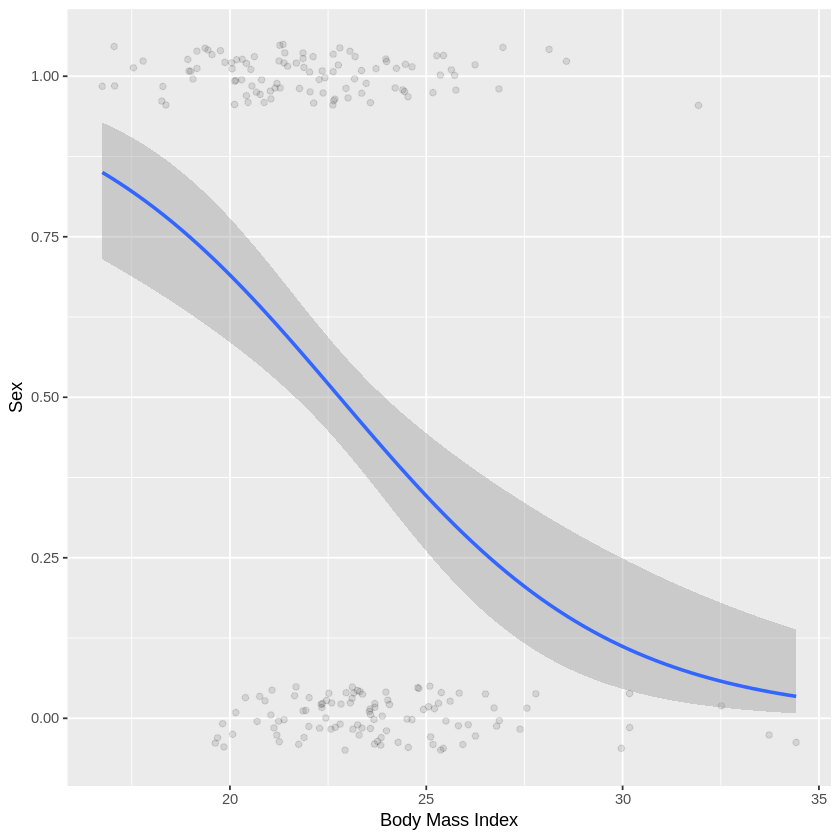

In [4]:
#plot of sex and red blood cell count
log_plot <- ggplot(data = AIS, aes(x = RCC, y = Sex)) + 
geom_jitter(alpha = 0.1, height = 0.05) + 
geom_smooth(method = "glm", method.args = list(family = "binomial")) + 
ylab("Sex")

log_plot + xlab("Red Cell Count")

#plot of sex and white cell count
log_plot <- ggplot(data = AIS, aes(x = WCC, y = Sex)) + 
geom_jitter(alpha = 0.1, height = 0.05) + 
geom_smooth(method = "glm", method.args = list(family = "binomial")) + 
ylab("Sex")

log_plot + xlab("White Cell Count")

#plot of sex and bmi
log_plot <- ggplot(data = AIS, aes(x = BMI, y = Sex)) + 
geom_jitter(alpha = 0.1, height = 0.05) + 
geom_smooth(method = "glm", method.args = list(family = "binomial")) + 
ylab("Sex")

log_plot + xlab("Body Mass Index")

In [5]:
logreg <- glm(Sex ~ RCC + WCC + BMI, family = "binomial", data = AIS) 
msummary(logreg)

Coefficients:
            Estimate Std. Error z value Pr(>|z|)    
(Intercept) 29.29399    3.92411   7.465 8.32e-14 ***
RCC         -5.34706    0.72118  -7.414 1.22e-13 ***
WCC          0.15505    0.12190   1.272  0.20338    
BMI         -0.22911    0.08723  -2.626  0.00863 ** 

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 280.01  on 201  degrees of freedom
Residual deviance: 147.01  on 198  degrees of freedom
AIC: 155.01

Number of Fisher Scoring iterations: 5

$3$. If scores are normally distributed with a mean of 42 and a standard deviation of 8, what percent of the scores is: 

(a) greater than 25? 

(b) smaller than 31? 

(c) between 25 and 31?

In [6]:
#a
q3a = 1 - pnorm(25,42,8)
#b
q3b = pnorm(31,42,8)
#c
q3c = q3a - q3b
"a"
q3a
"b"
q3b
"c"
q3c

[1] "a"

[1] 0.9832067

[1] "b"

[1] 0.08456572

[1] "c"

[1] 0.898641

$4$. From the following table:
![title](table1.png)

a. Apply the appropiate tests to evaluate the null hypothesis that there is no difference in the noise values means at different vehicle sizes. 

b. Examine all assumptions related to the test and make sure that the data follows all of those assumptions.

In [7]:
library(gtools)
small = c(810,820,820,835,835,835)
medium = c(840,840,840,845,855,850)
large = c(785,790,785,760,760,770)

vehicle_noise = rbind(small=small,medium=medium,large=large)

vehicle = as.data.frame(t(vehicle_noise))
vehicle


Attaching package: ‘gtools’

The following object is masked from ‘package:mosaic’:

    logit



small,medium,large
810,840,785
820,840,790
820,840,785
835,845,760
835,855,760
835,850,770


[1] 825.8333

[1] 845

[1] 775

[1] 10.68488

[1] 6.324555

[1] 13.41641

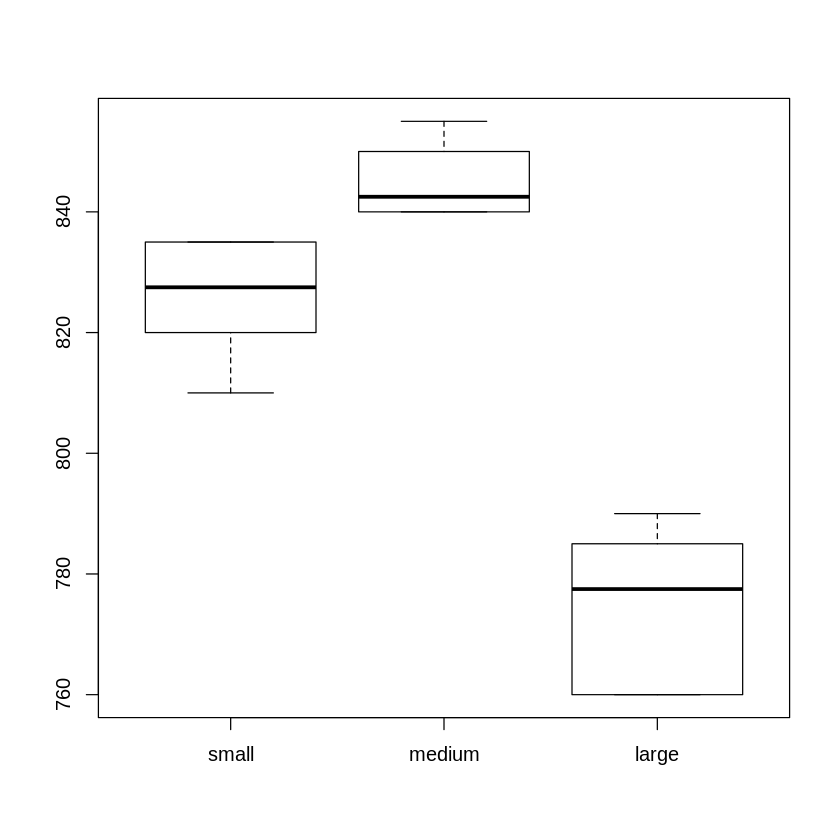

In [8]:
mean(vehicle$small)
mean(vehicle$medium)
mean(vehicle$large)
sd(vehicle$small)
sd(vehicle$medium)
sd(vehicle$large)
boxplot(vehicle)

In [9]:
# Compute the analysis of variance
res.aov <- aov(small ~ medium + large, data = vehicle)
# Summary of the analysis
summary(res.aov)

            Df Sum Sq Mean Sq F value Pr(>F)  
medium       1  378.1   378.1   9.388 0.0548 .
large        1   71.9    71.9   1.784 0.2739  
Residuals    3  120.8    40.3                 
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

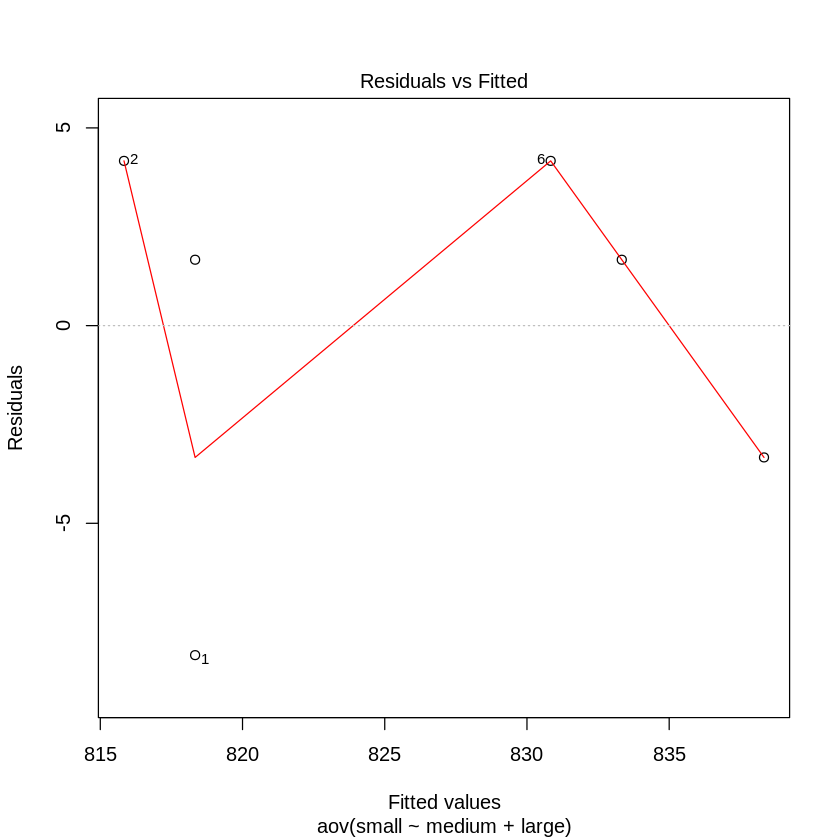

In [10]:
plot(res.aov, 1)

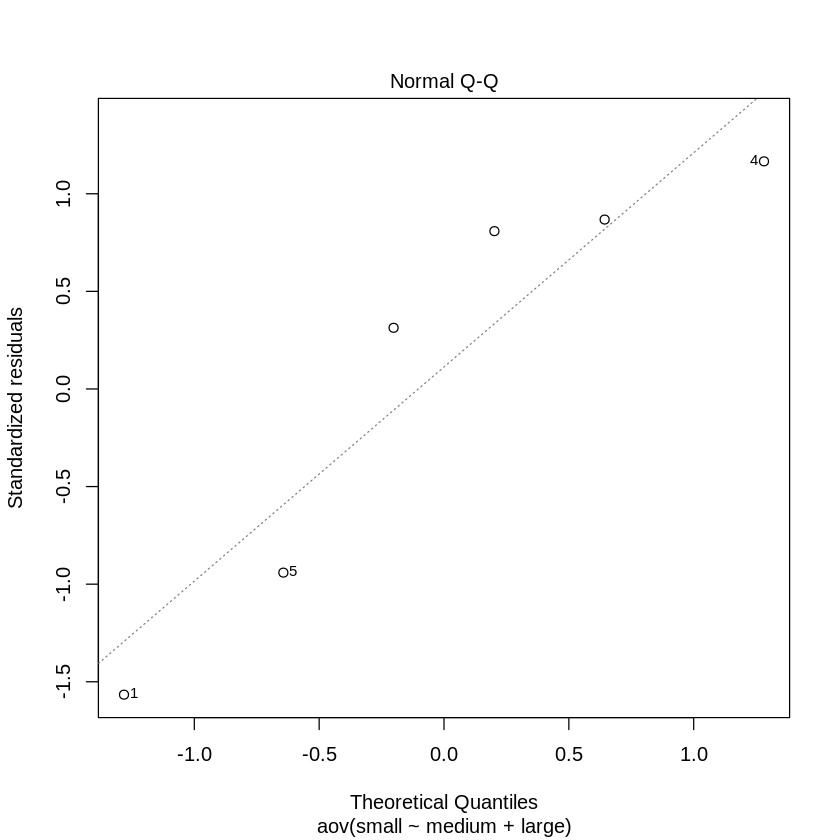

In [11]:
plot(res.aov, 2)

In [12]:
# Extract the residuals
aov_residuals <- residuals(object = res.aov )
# Run Shapiro-Wilk test
shapiro.test(x = aov_residuals )


	Shapiro-Wilk normality test

data:  aov_residuals
W = 0.85134, p-value = 0.1614


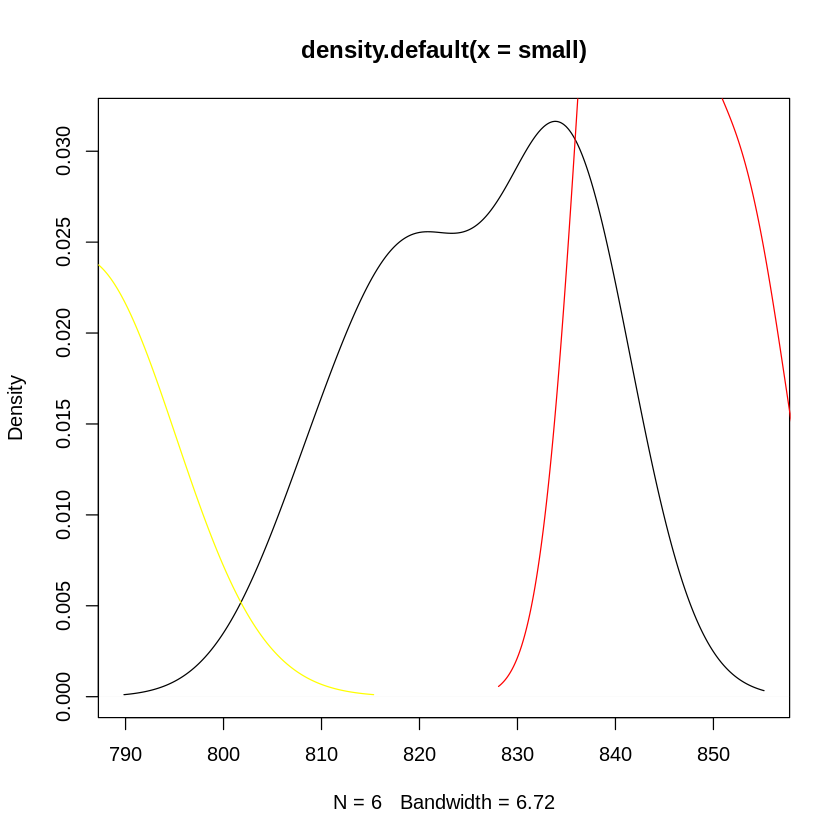

In [13]:
dsmall = density(small)
dmedium = density(medium)
dlarge = density(large)
plot(dsmall)
lines(dmedium, col = "red")
lines(dlarge, col = "yellow")

In [14]:
var.test(small, medium)
var.test(small, large)
var.test(medium, small)
var.test(medium, large)
var.test(large, small)
var.test(large, medium)


	F test to compare two variances

data:  small and medium
F = 2.8542, num df = 5, denom df = 5, p-value = 0.2744
alternative hypothesis: true ratio of variances is not equal to 1
95 percent confidence interval:
  0.3993863 20.3969648
sample estimates:
ratio of variances 
          2.854167 



	F test to compare two variances

data:  small and large
F = 0.63426, num df = 5, denom df = 5, p-value = 0.6295
alternative hypothesis: true ratio of variances is not equal to 1
95 percent confidence interval:
 0.0887525 4.5326588
sample estimates:
ratio of variances 
         0.6342593 



	F test to compare two variances

data:  medium and small
F = 0.35036, num df = 5, denom df = 5, p-value = 0.2744
alternative hypothesis: true ratio of variances is not equal to 1
95 percent confidence interval:
 0.0490269 2.5038418
sample estimates:
ratio of variances 
          0.350365 



	F test to compare two variances

data:  medium and large
F = 0.22222, num df = 5, denom df = 5, p-value = 0.1244
alternative hypothesis: true ratio of variances is not equal to 1
95 percent confidence interval:
 0.03109577 1.58808485
sample estimates:
ratio of variances 
         0.2222222 



	F test to compare two variances

data:  large and small
F = 1.5766, num df = 5, denom df = 5, p-value = 0.6295
alternative hypothesis: true ratio of variances is not equal to 1
95 percent confidence interval:
  0.2206211 11.2672881
sample estimates:
ratio of variances 
          1.576642 



	F test to compare two variances

data:  large and medium
F = 4.5, num df = 5, denom df = 5, p-value = 0.1244
alternative hypothesis: true ratio of variances is not equal to 1
95 percent confidence interval:
  0.6296893 32.1587182
sample estimates:
ratio of variances 
               4.5 


$5$. The Central Limit Theorem states that as we increase our sample size sufficiently, the mean of all samples drawn from the population will be approximately equal to the mean of the population.

a. True

b. False

In [16]:
"a. True"

[1] "a. True"

$6$. Consider the following scenario: A data scientist has been asked to conduct a research on the effect of a treatment on anorexia patients. The data corresponded to weight change data for young female anorexia patient. The data contain three columns:


- treat: Factor of three levels: "Cont" (control), "CBT" (Cognitive Behavioural treatment) and "FT" (family treatment).
- Prewt: Weight of patient before study period, in lbs.
- Postwt:Weight of patient after study period, in lbs.

A. Is there a difference between the mean female patiente weights before and after the study across all treatments?

In [17]:
library(MASS)
attach(anorexia)
head(anorexia)


Attaching package: ‘MASS’

The following object is masked from ‘package:dplyr’:

    select



Treat,Prewt,Postwt
Cont,80.7,80.2
Cont,89.4,80.1
Cont,91.8,86.4
Cont,74.0,86.3
Cont,78.1,76.1
Cont,88.3,78.1


In [18]:
levels(anorexia$Treat)

[1] "CBT"  "Cont" "FT"

In [19]:
anorexia$Treat <- ordered(anorexia$Treat,
                         levels = c("Cont", "CBT", "FT"))

In [20]:
library(dplyr)
"Pre Weight"
group_by(anorexia, Treat) %>%
  summarise(
    count = n(),
    mean = mean(Prewt, na.rm = TRUE),
    sd = sd(Prewt, na.rm = TRUE)
  )
"Post Weight"
group_by(anorexia, Treat) %>%
  summarise(
    count = n(),
    mean = mean(Postwt, na.rm = TRUE),
    sd = sd(Postwt, na.rm = TRUE)
  )

[1] "Pre Weight"

Treat,count,mean,sd
Cont,26,81.55769,5.707060
CBT,29,82.68966,4.845495
FT,17,83.22941,5.016693


[1] "Post Weight"

Treat,count,mean,sd
Cont,26,81.10769,4.744253
CBT,29,85.69655,8.351924
FT,17,90.49412,8.475072


In [21]:
t.test(anorexia$Prewt,anorexia$Postwt, paired=TRUE)


	Paired t-test

data:  anorexia$Prewt and anorexia$Postwt
t = -2.9376, df = 71, p-value = 0.004458
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 -4.6399424 -0.8878354
sample estimates:
mean of the differences 
              -2.763889 


In [22]:
install.packages("pwr")

Updating HTML index of packages in '.Library'
Making 'packages.html' ... done


In [23]:
library(pwr)
cohen.ES(test = "t", size = "medium")


     Conventional effect size from Cohen (1982) 

           test = t
           size = medium
    effect.size = 0.5


In [24]:
pwr.t.test(n = 72, d = 0.5, sig.level = 0.05)


     Two-sample t test power calculation 

              n = 72
              d = 0.5
      sig.level = 0.05
          power = 0.8460618
    alternative = two.sided

NOTE: n is number in *each* group


In [25]:
pwr.t.test(d = 0.5, power = 0.846, sig.level = 0.05) 


     Two-sample t test power calculation 

              n = 71.98758
              d = 0.5
      sig.level = 0.05
          power = 0.846
    alternative = two.sided

NOTE: n is number in *each* group


also installing the dependencies ‘ggrepel’, ‘ggsci’, ‘cowplot’, ‘ggsignif’

Updating HTML index of packages in '.Library'
Making 'packages.html' ... done
Loading required package: magrittr


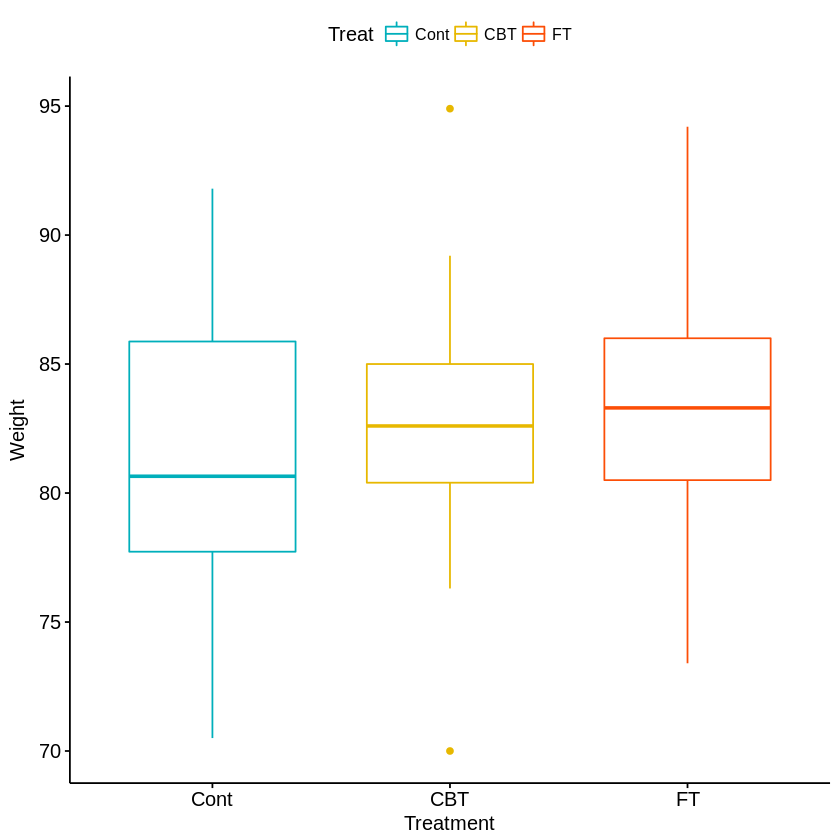

In [27]:
#install.packages("ggpubr")
library("ggpubr")
ggboxplot(anorexia, x = "Treat", y = "Prewt", 
          color = "Treat", palette = c("#00AFBB", "#E7B800", "#FC4E07"),
          order = c("Cont", "CBT", "FT"),
          ylab = "Weight", xlab = "Treatment")

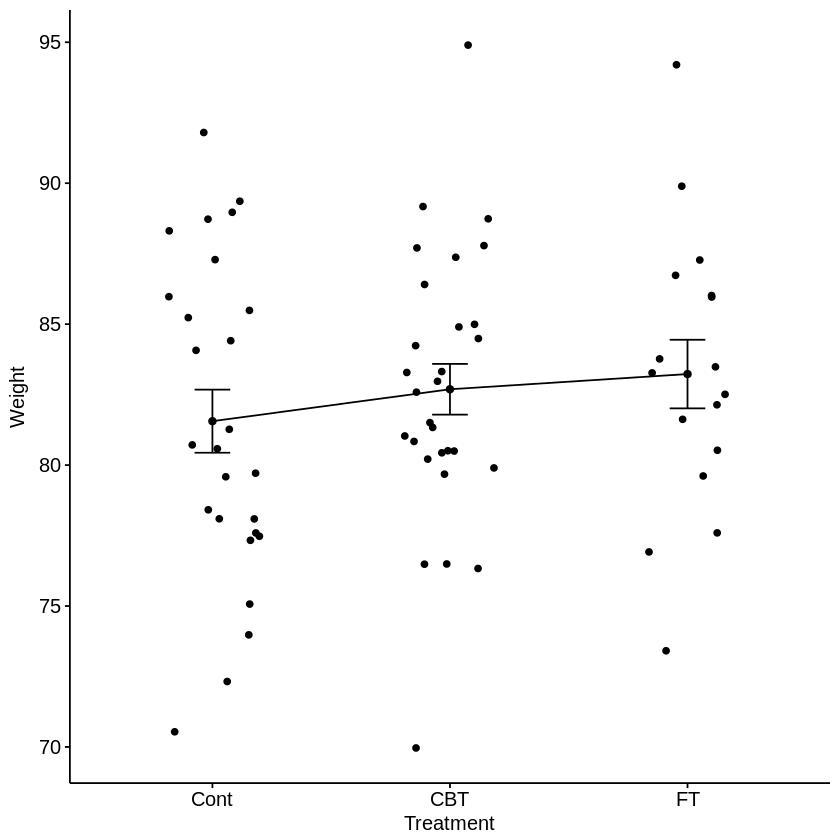

In [28]:
ggline(anorexia, x = "Treat", y = "Prewt", 
       add = c("mean_se", "jitter"), 
       order = c("Cont", "CBT", "FT"),
       ylab = "Weight", xlab = "Treatment")

$7$. In Hypothesis testing, the critical region is the probability that the test statistic equals the observed value or a more extreme value under the assumption that the null hypthothesis is true.

a. True

b. False

In [29]:
"b. False"

[1] "b. False"

$8$. The following data reports the calorie content of beef hot dogs. Here are the numbers of calories of a random sample of 20 different hot dogs:

186, 181, 176, 149, 184, 190, 158, 139, 175, 148, 152, 111, 141, 153, 190, 157, 131, 149, 135, 132.

Assume that these numbers are the observed values from a random sample of twenty independent normal random variables with mean μ and variance σ2, both unknown. Find the 90% confidence intervals for the mean number of calories μ.

[1] 156.85

[1] 22.64201

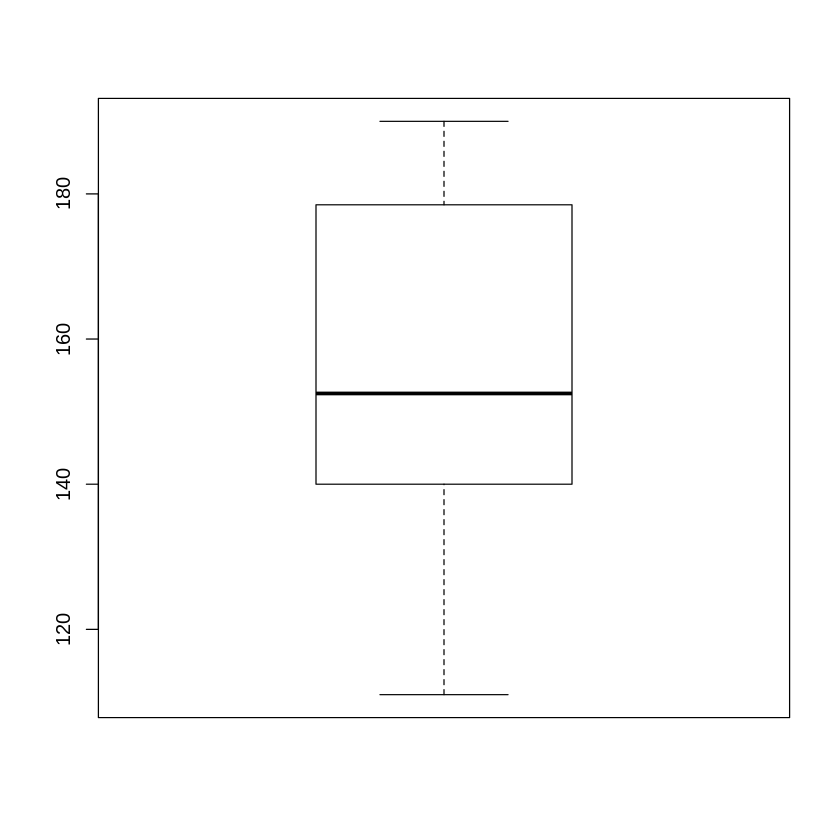

In [30]:
hot_dogs = c(186, 181, 176, 149, 184, 190, 158, 139, 175, 148, 152, 111, 141, 153, 190, 157, 131, 149, 135, 132)
expected_hotdogs = rnorm(20,)
mean(hot_dogs)
sd(hot_dogs)
boxplot(hot_dogs)

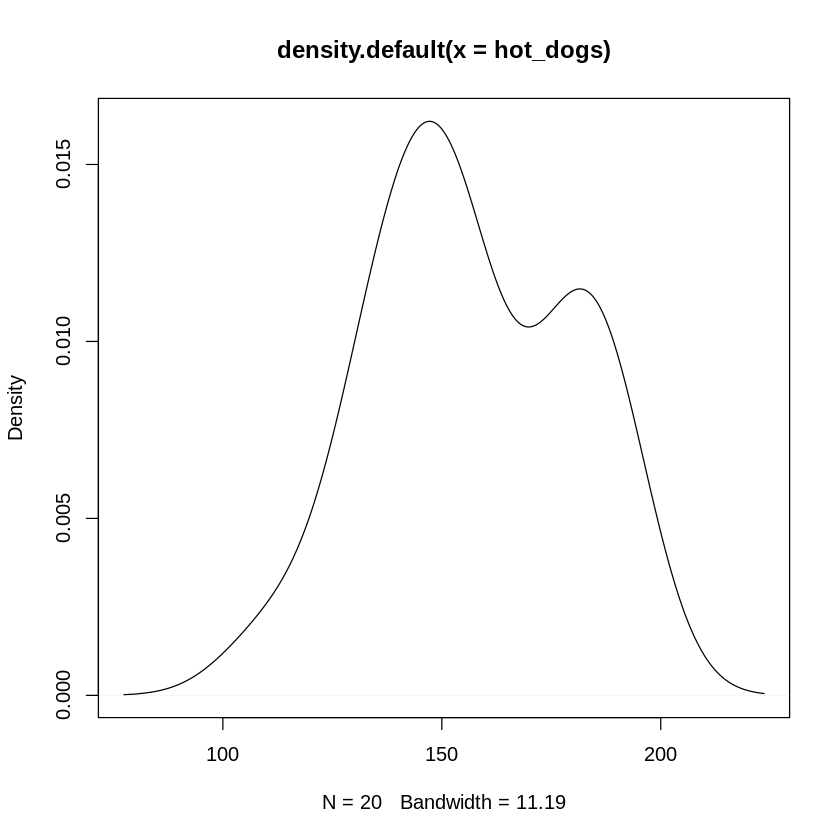

In [31]:
density_dogs = density(hot_dogs)
plot(density_dogs)

In [32]:
confidence_interval <- function(vector, interval) {
  # Standard deviation of sample
  vec_sd <- sd(vector)
  # Sample size
  n <- length(vector)
  # Mean of sample
  vec_mean <- mean(vector)
  # Error according to t distribution
  error <- qt((interval + 1)/2, df = n - 1) * vec_sd / sqrt(n)
  # Confidence interval as a vector
  result <- c("lower" = vec_mean - error, "upper" = vec_mean + error)
  return(result)
}

In [35]:
confidence_interval(hot_dogs,.90)

lower    upper 
148.0956 165.6044

In [36]:
xbar = mean(hot_dogs)           # sample mean 
#mu0 = 120           # hypothesized value 
s = sd(hot_dogs)               # sample standard deviation 
n = 20                 # sample size 

##Lets calculate the t critical value
#t = (xbar-mu0)/(s/sqrt(n))
t = 1.725

alpha = .1
t.half.alpha = qt(1-alpha/2, n-1)
c(-t.half.alpha, t.half.alpha)

pval = 2*pt(t, n-1, lower=F) # if do lower = T you are giving it directionality, assuming the data has a direction
#from the mean of the population
pval

(xbar+qt(1-(alpha/2),n-1)*(s/sqrt(n))) #upper limit of the expected mean of population sampled
(xbar-qt(1-(alpha/2),n-1)*(s/sqrt(n))) #lower limit of the expected mean of population sampled

[1] -1.729133  1.729133

[1] 0.1007572

[1] 165.6044

[1] 148.0956

$9$. Which type of predictor variables can be included in a General Linear Model

a. Logistic

b. Normal

c. Categorical

d. continuous

e. Mixed


In [37]:
"d. continuous"

[1] "d. continuous"

$10$. The dataset anscombe.txt represent 4 different datasets constructed by Anscombe in 1973. The x and y variables are matched to each dataset respectively (e.g. x1 corresponds to y1, etc). Produce a Simple linear regression for each dataset (write the linear equation for each model), generate residuals plots, and discuss which is the most appropiate model from the 4 datasets and why.

In [38]:
ansc = read.table(file = "anscombe.txt", header = T, stringsAsFactors = F)
head(ansc)

case,x1,x2,x3,x4,y1,y2,y3,y4
1,10,10,10,8,8.04,9.14,7.46,6.58
2,8,8,8,8,6.95,8.14,6.77,5.76
3,13,13,13,8,7.58,8.74,12.74,7.71
4,9,9,9,8,8.81,8.77,7.11,8.84
5,11,11,11,8,8.33,9.26,7.81,8.47
6,14,14,14,8,9.96,8.10,8.84,7.04


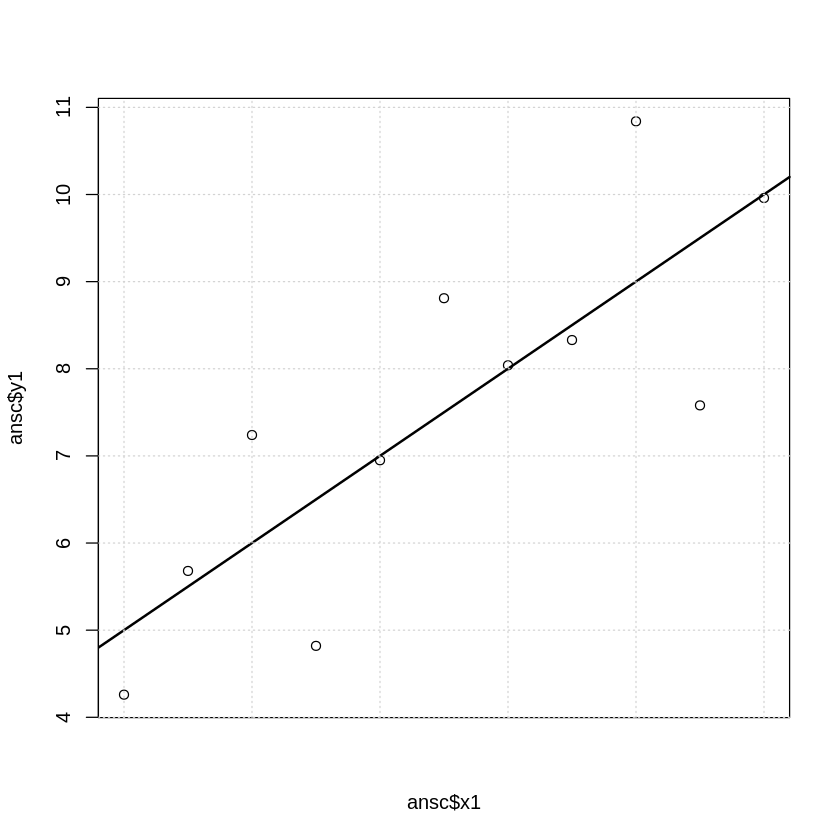

In [39]:
ansc1 <- lm(ansc$y1 ~ ansc$x1)
plot(ansc$x1, ansc$y1, xaxt="n")
abline(ansc1, lwd=2)
grid(nx = NULL,ny = NULL)

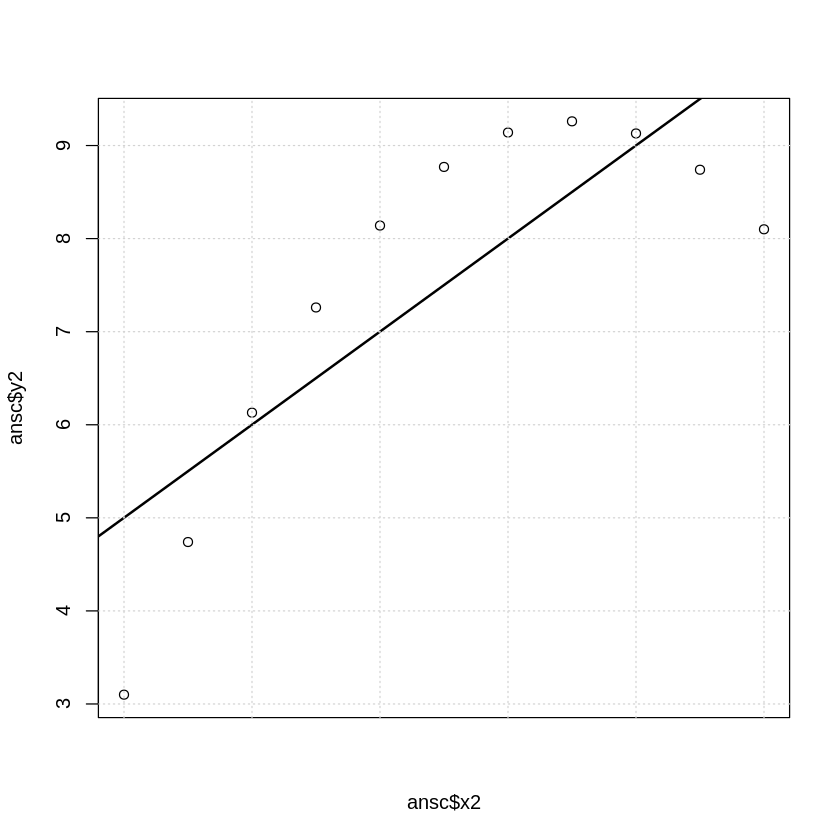

In [40]:
ansc2 <- lm(ansc$y2 ~ ansc$x2)
plot(ansc$x2, ansc$y2, xaxt="n")
abline(ansc2, lwd=2)
grid(nx = NULL,ny = NULL)

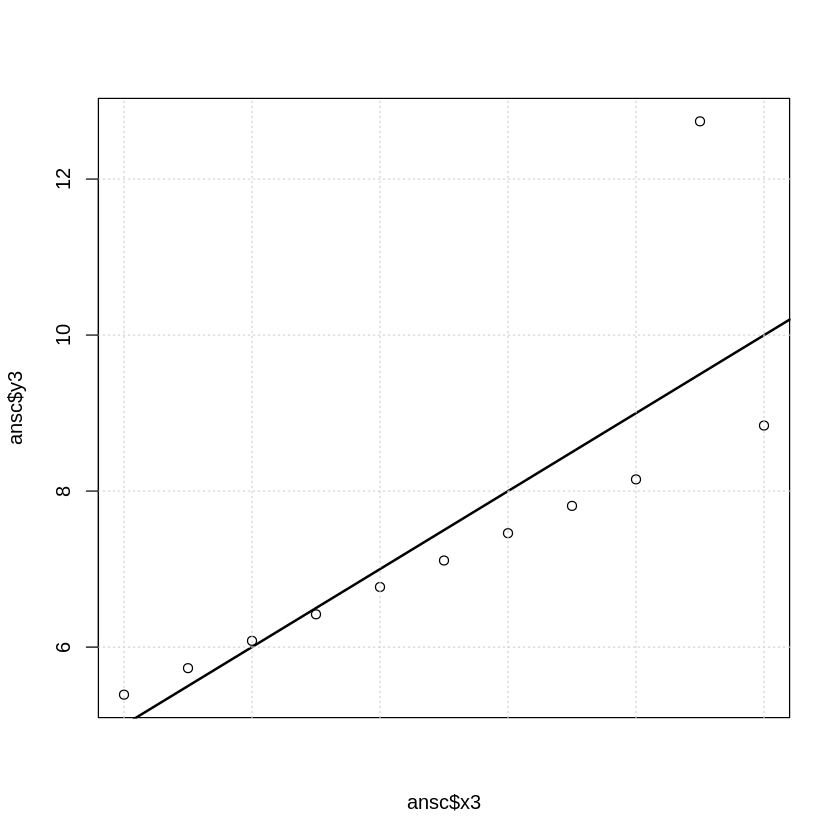

In [41]:
ansc3 <- lm(ansc$y3 ~ ansc$x3)
plot(ansc$x3, ansc$y3, xaxt="n")
abline(ansc3, lwd=2)
grid(nx = NULL,ny = NULL)

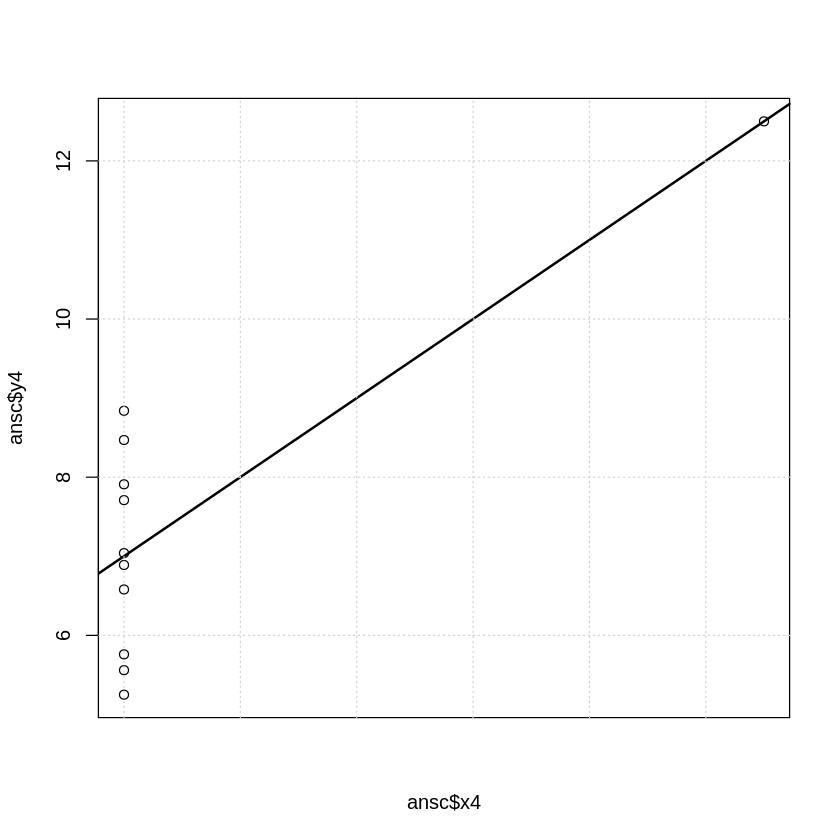

In [42]:
ansc4 <- lm(ansc$y4 ~ ansc$x4)
plot(ansc$x4, ansc$y4, xaxt="n")
abline(ansc4, lwd=2)
grid(nx = NULL,ny = NULL)

Updating HTML index of packages in '.Library'
Making 'packages.html' ... done


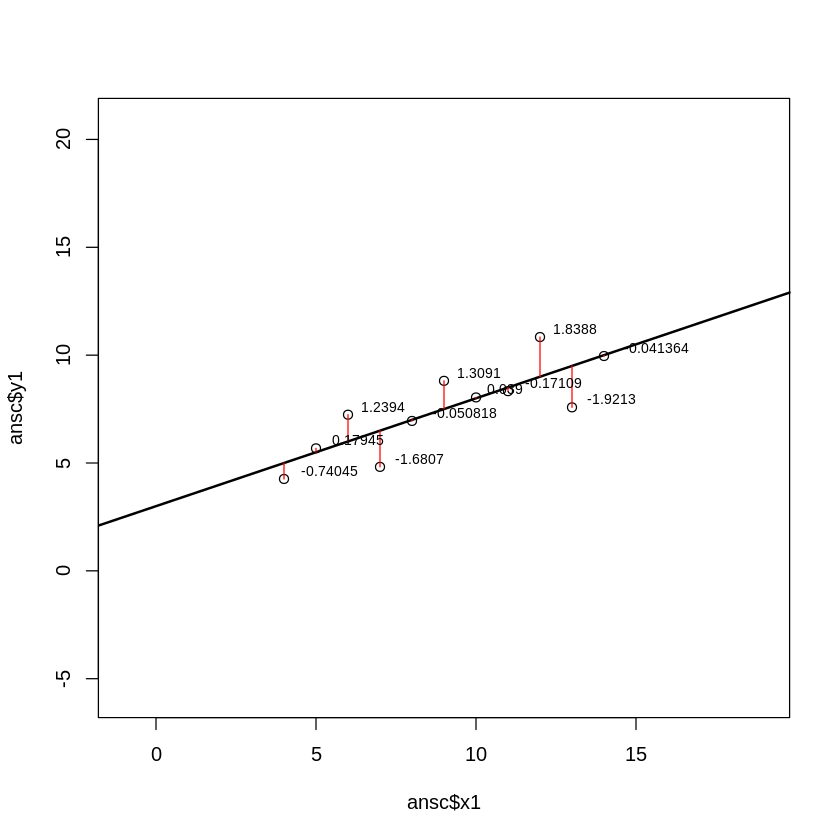

In [43]:
# calculate residuals and predicted values
plot(ansc$x1, ansc$y1, xlim=c(min(ansc$x1)-5, max(ansc$x1)+5), ylim=c(min(ansc$y1)-10, max(ansc$y1)+10))
abline(ansc1, lwd=2)
res <- signif(residuals(ansc1), 5)
pre <- predict(ansc1) # plot distances between points and the regression line
segments(ansc$x1, ansc$y1, ansc$x1, pre, col="red")

# add labels (residual values) to points
install.packages("calibrate")
library(calibrate)
textxy(ansc$x1, ansc$y1, res, cex=0.7)

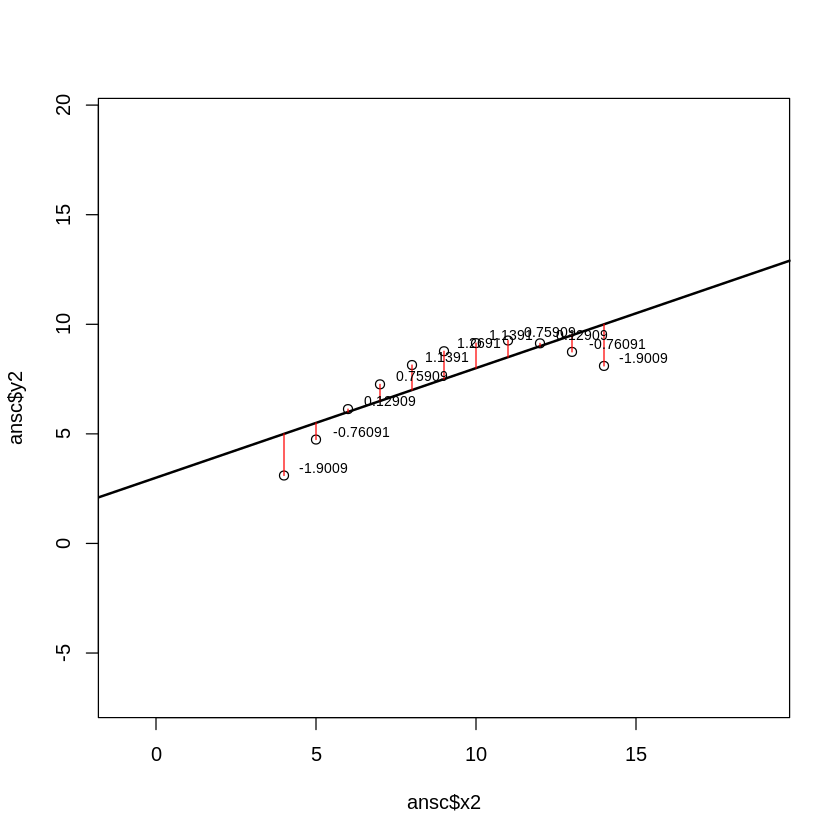

In [44]:
# calculate residuals and predicted values
plot(ansc$x2, ansc$y2, xlim=c(min(ansc$x2)-5, max(ansc$x2)+5), ylim=c(min(ansc$y2)-10, max(ansc$y2)+10))
abline(ansc2, lwd=2)
res2 <- signif(residuals(ansc2), 5)
pre2 <- predict(ansc2) # plot distances between points and the regression line
segments(ansc$x2, ansc$y2, ansc$x2, pre2, col="red")

# add labels (residual values) to points
textxy(ansc$x2, ansc$y2, res2, cex=0.7)

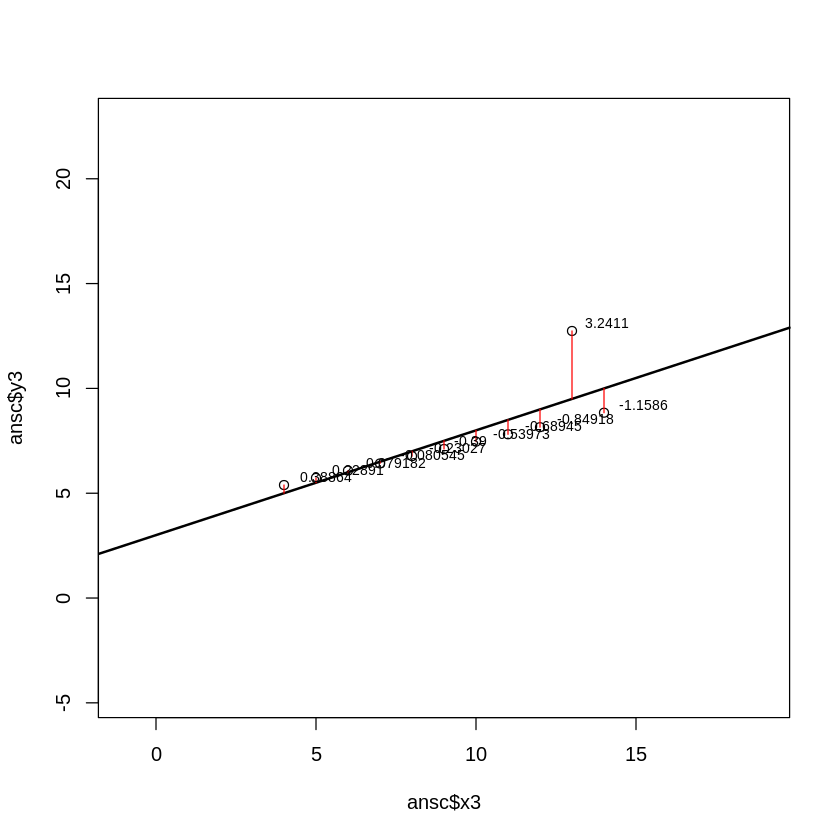

In [45]:
# calculate residuals and predicted values
plot(ansc$x3, ansc$y3, xlim=c(min(ansc$x3)-5, max(ansc$x3)+5), ylim=c(min(ansc$y3)-10, max(ansc$y3)+10))
abline(ansc3, lwd=2)
res3 <- signif(residuals(ansc3), 5)
pre3 <- predict(ansc3) # plot distances between points and the regression line
segments(ansc$x3, ansc$y3, ansc$x3, pre3, col="red")

# add labels (residual values) to points
textxy(ansc$x3, ansc$y3, res3, cex=0.7)

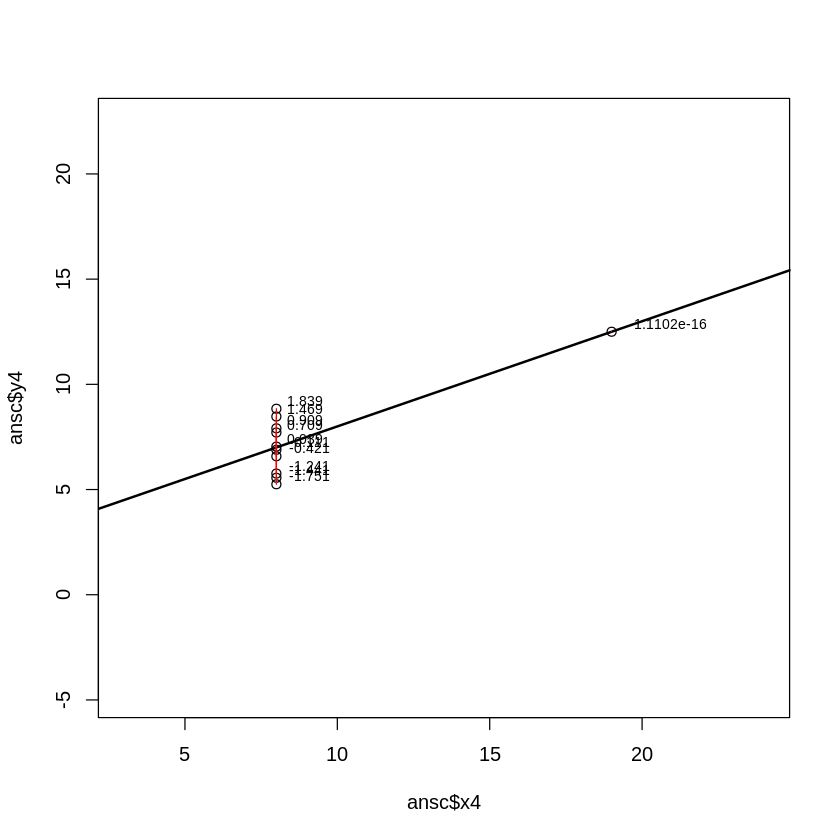

In [46]:
# calculate residuals and predicted values
plot(ansc$x4, ansc$y4, xlim=c(min(ansc$x4)-5, max(ansc$x4)+5), ylim=c(min(ansc$y4)-10, max(ansc$y4)+10))
abline(ansc4, lwd=2)
res4 <- signif(residuals(ansc4), 5)
pre4 <- predict(ansc4) # plot distances between points and the regression line
segments(ansc$x4, ansc$y4, ansc$x4, pre4, col="red")

# add labels (residual values) to points
textxy(ansc$x4, ansc$y4, res4, cex=0.7)

In [47]:
coef(ansc1)
coef(ansc2)
coef(ansc3)
coef(ansc4)

(Intercept)     ansc$x1 
  3.0000909   0.5000909

(Intercept)     ansc$x2 
   3.000909    0.500000

(Intercept)     ansc$x3 
  3.0024545   0.4997273

(Intercept)     ansc$x4 
  3.0017273   0.4999091

In [48]:
library(tibble)

In [49]:
cor_res <- cor.test(ansc$y1, ansc$x1, 
                method = "pearson")
cor_res2 <- cor.test(ansc$y2, ansc$x2, 
                method = "pearson")
cor_res3 <- cor.test(ansc$y3, ansc$x3, 
                method = "pearson")
cor_res4 <- cor.test(ansc$y4, ansc$x4, 
                method = "pearson")
cor_res
cor_res2
cor_res3
cor_res4


	Pearson's product-moment correlation

data:  x and y
t = 4.2415, df = 9, p-value = 0.00217
alternative hypothesis: true correlation is not equal to 0
95 percent confidence interval:
 0.4243912 0.9506933
sample estimates:
      cor 
0.8164205 



	Pearson's product-moment correlation

data:  x and y
t = 4.2386, df = 9, p-value = 0.002179
alternative hypothesis: true correlation is not equal to 0
95 percent confidence interval:
 0.4239389 0.9506402
sample estimates:
      cor 
0.8162365 



	Pearson's product-moment correlation

data:  x and y
t = 4.2394, df = 9, p-value = 0.002176
alternative hypothesis: true correlation is not equal to 0
95 percent confidence interval:
 0.4240623 0.9506547
sample estimates:
      cor 
0.8162867 



	Pearson's product-moment correlation

data:  x and y
t = 4.243, df = 9, p-value = 0.002165
alternative hypothesis: true correlation is not equal to 0
95 percent confidence interval:
 0.4246394 0.9507224
sample estimates:
      cor 
0.8165214 


Warning message:
“Deprecated: please use `purrr::possibly()` instead”Warning message:
“Deprecated: please use `purrr::possibly()` instead”Warning message:
“Deprecated: please use `purrr::possibly()` instead”Warning message:
“Deprecated: please use `purrr::possibly()` instead”Warning message:
“Deprecated: please use `purrr::possibly()` instead”

[[1]]


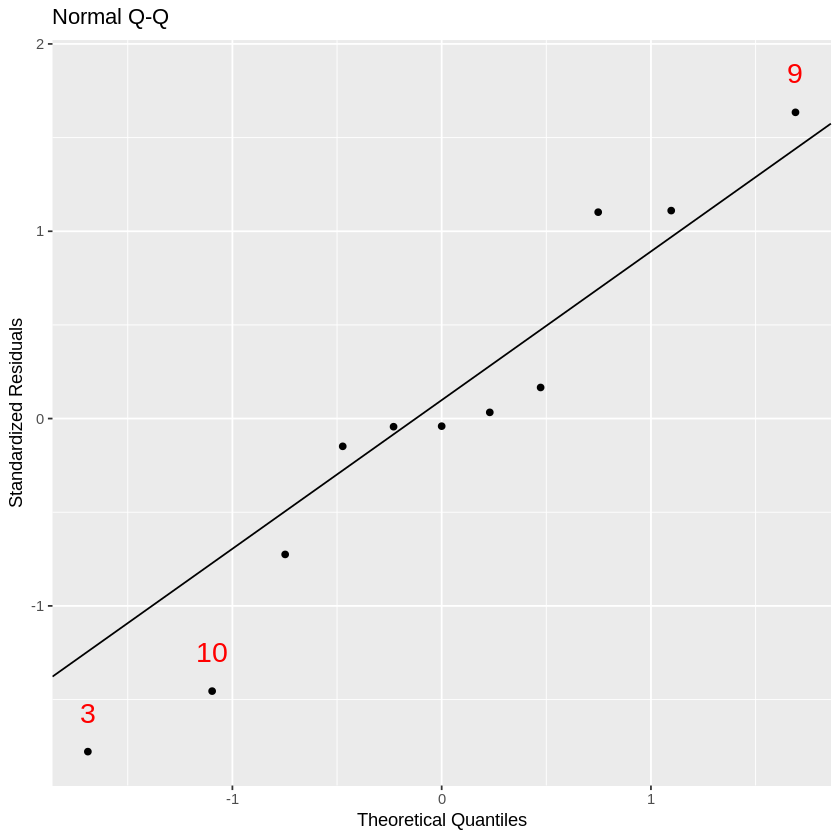

In [50]:
mplot(ansc1, which = 2, system = "ggplot2")

Warning message:
“Deprecated: please use `purrr::possibly()` instead”Warning message:
“Deprecated: please use `purrr::possibly()` instead”Warning message:
“Deprecated: please use `purrr::possibly()` instead”Warning message:
“Deprecated: please use `purrr::possibly()` instead”Warning message:
“Deprecated: please use `purrr::possibly()` instead”

[[1]]


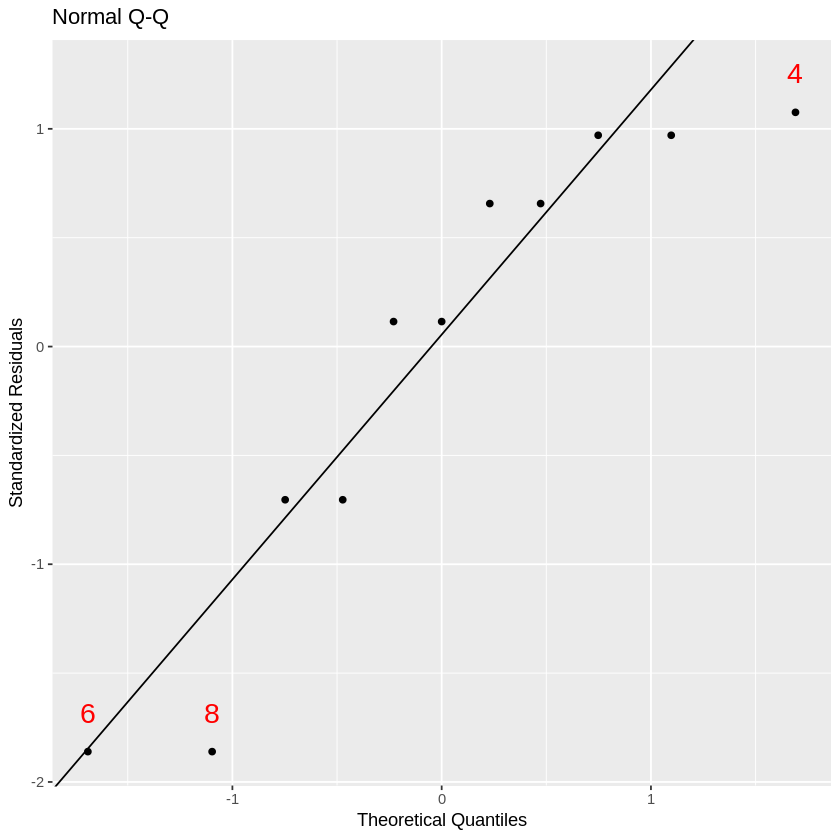

In [51]:
mplot(ansc2, which = 2, system = "ggplot2")

Warning message:
“Deprecated: please use `purrr::possibly()` instead”Warning message:
“Deprecated: please use `purrr::possibly()` instead”Warning message:
“Deprecated: please use `purrr::possibly()` instead”Warning message:
“Deprecated: please use `purrr::possibly()` instead”Warning message:
“Deprecated: please use `purrr::possibly()` instead”

[[1]]


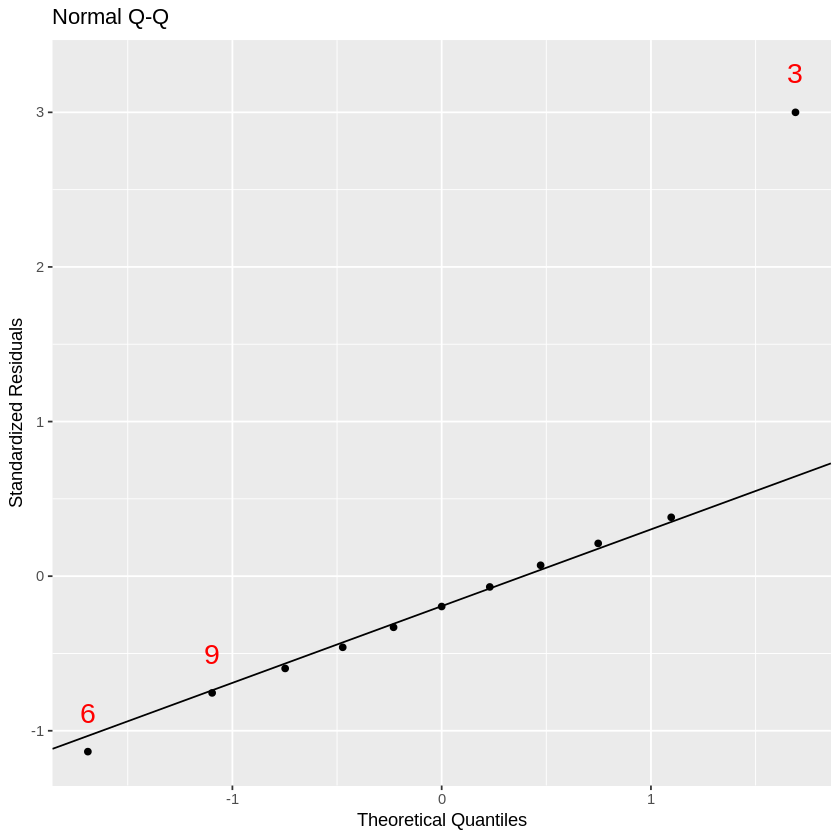

In [52]:
mplot(ansc3, which = 2, system = "ggplot2")

In [ ]:
"model 3 from the data sets would be the most appropriate
as it's data has the least outliers and more linear of a
regression line"